# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import requests
import gmaps
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#get the weather data in imperial units--because, America clings to imperial units like a security blanket.
#after this many years its just sad
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
#Gonna need someplace to put the data,attempt to keep columns similar to original data pulled--my 'cute names' have burned me
#many many times now
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
#set variable to 1
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. if it fails, we don't want it to stop, just throw an error and keep going
#Try/except loop section
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|albany
Processing record 2|jiayuguan
Processing record 3|vaini
Processing record 4|alugan
Processing record 5|port pirie
Processing record 6|longyearbyen
Processing record 7|chiang kham
Processing record 8|kuusankoski
Processing record 9|richards bay
Processing record 10|barrow
Processing record 11|pangnirtung
Processing record 12|najran
Processing record 13|cidreira
Processing record 14|severo-kurilsk
Processing record 15|provideniya
Processing record 16|rikitea
Processing record 17|butaritari
Processing record 18|esperance
Processing record 19|hithadhoo
Processing record 20|ushuaia
Processing record 21|beyneu
Processing record 22|kotli loharan
Processing record 23|aasiaat
Processing record 24|zhigansk
City not found. skipping.
Processing record 25|bathsheba
Processing record 26|mount gambier
Processing record 27|mataura
Processing record 28|puerto ayora
Processing record 29|bluff
Processing record 30|dikson
Processing record 31|mahebourg
Processing record 32|kapaa

Processing record 248|bodden town
Processing record 249|paamiut
Processing record 250|assiniboia
Processing record 251|bekovo
Processing record 252|winkler
Processing record 253|minab
Processing record 254|ancud
Processing record 255|ahuimanu
Processing record 256|sitka
Processing record 257|aksarka
Processing record 258|gairo
Processing record 259|ongandjera
Processing record 260|ostrovnoy
Processing record 261|haines junction
City not found. skipping.
Processing record 262|natal
Processing record 263|berlevag
City not found. skipping.
City not found. skipping.
City not found. skipping.
Processing record 264|tianpeng
Processing record 265|port hardy
Processing record 266|meulaboh
Processing record 267|la roche-sur-yon
Processing record 268|beringovskiy
Processing record 269|vao
Processing record 270|sakakah
Processing record 271|knarvik
City not found. skipping.
Processing record 272|koslan
Processing record 273|villa carlos paz
Processing record 274|sagarejo
Processing record 275|mar

Processing record 489|ambilobe
Processing record 490|bushehr
Processing record 491|lugovoy
Processing record 492|zyryanka
Processing record 493|qaqortoq
City not found. skipping.
City not found. skipping.
Processing record 494|huilong
Processing record 495|lodja
Processing record 496|honiara
Processing record 497|popondetta
Processing record 498|inyonga
Processing record 499|beba
Processing record 500|svolvaer
Processing record 501|narasannapeta
Processing record 502|catabola
Processing record 503|jacareacanga
Processing record 504|nizwa
Processing record 505|jacmel
Processing record 506|omboue
Processing record 507|bonavista
Processing record 508|bayir
City not found. skipping.
Processing record 509|akdepe
Processing record 510|namibe
Processing record 511|mafeteng
Processing record 512|sola
Processing record 513|kahului
Processing record 514|ketchikan
Processing record 515|tagusao
Processing record 516|rovaniemi
Processing record 517|tumarbong
Processing record 518|umea
Processing re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Creating city dataframe
cities = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = cities.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("..//output_data//city.csv")

#Displaying dataframe
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Albany,94,US,1659388843,49,42.6001,-73.9662,86.58,5.39
1,Jiayuguan City,100,CN,1659388869,63,39.8167,98.3000,65.35,7.65
2,Vaini,40,TO,1659388869,89,-21.2000,-175.2000,78.96,0.00
3,Alugan,100,PH,1659388870,91,12.2188,125.4808,76.75,3.76
4,Port Pirie,89,AU,1659388870,55,-33.1833,138.0167,48.90,10.18


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#check to see if we have any 100% humidity cities (Max=100 on humidity- we have at least 1, will need to filter it out)
city_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,553.000000,5.530000e+02,553.000000,553.000000,553.000000,553.000000,553.000000
mean,54.318264,1.659389e+09,72.558770,19.301102,19.787252,69.349421,8.465787
std,39.148037,7.392673e+01,19.475753,33.730285,90.627919,14.014988,5.592780
min,0.000000,1.659389e+09,7.000000,-54.800000,-175.200000,35.190000,0.000000
25%,15.000000,1.659389e+09,62.000000,-8.759700,-59.516700,58.780000,4.340000
50%,58.000000,1.659389e+09,77.000000,21.444700,25.716700,71.580000,7.560000
75%,98.000000,1.659389e+09,87.000000,47.804300,101.383300,79.450000,11.500000
max,100.000000,1.659389e+09,100.000000,78.218600,179.316700,105.220000,32.440000


In [7]:
print (len(city_df))

553


In [8]:
#  Get the indices of cities that have humidity over 100%.
All_humid = city_df.loc[(city_df['Humidity']==100)]
#we had some with this pull- had zero with other pulls, just the luck of the 'random' function
print (len(All_humid))

8


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
##looking for 545 (553-8 with humidity @100%) total rows
#not super fond of the long name "clean_city_data", but it's in the instructions, so....
clean_city_data=pd.merge(city_df,All_humid, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
print(len(clean_city_data))
#Yay 545!

545


In [10]:
clean_city_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,94,US,1659388843,49,42.6001,-73.9662,86.58,5.39
1,Jiayuguan City,100,CN,1659388869,63,39.8167,98.3000,65.35,7.65
2,Vaini,40,TO,1659388869,89,-21.2000,-175.2000,78.96,0.00
3,Alugan,100,PH,1659388870,91,12.2188,125.4808,76.75,3.76
4,Port Pirie,89,AU,1659388870,55,-33.1833,138.0167,48.90,10.18


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

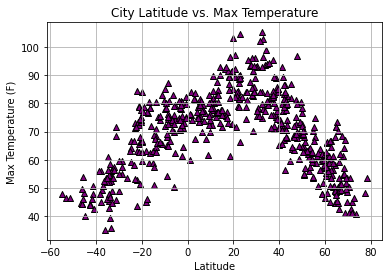

In [12]:
#Creating plot
#note random color and marker selections to get practice changing coloration and marker types in scatterplots
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker = "^", color = "purple",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature")
plt.savefig("..//output_data//Lat_vs_temp_plot")
plt.show()


## Latitude vs. Humidity Plot

The plot shows no discernable patterns between latitude and humidity


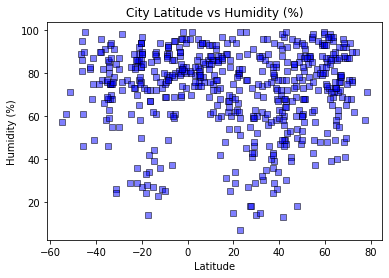

In [66]:
plt.scatter(pd.to_numeric(clean_city_data['Lat']).astype(float), pd.to_numeric(clean_city_data['Humidity']).astype(float), marker = "s",facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%)")
print("The plot shows no discernable patterns between latitude and humidity")
plt.savefig("..//output_data//lat_vs_humid_plot")
plt.show()

## Latitude vs. Cloudiness Plot

The plot shows no relation of note between latitude and cloudiness


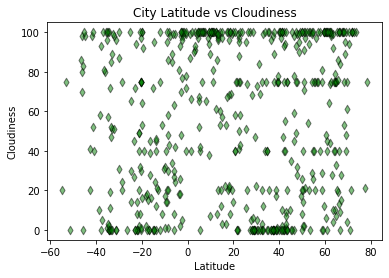

In [67]:
plt.scatter(pd.to_numeric(clean_city_data["Lat"]).astype(float), pd.to_numeric(clean_city_data["Cloudiness"]).astype(float), marker = "d",facecolors="green", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs Cloudiness")
print("The plot shows no relation of note between latitude and cloudiness")
plt.savefig("..//output_data//lat_vs_cloud_plot")
plt.show()


## Latitude vs. Wind Speed Plot

The plot shows no noticeable correlation between latitude and wind speed


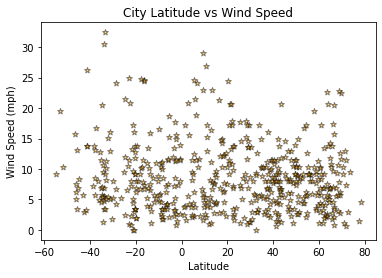

In [68]:
plt.scatter(pd.to_numeric(clean_city_data["Lat"]).astype(float), pd.to_numeric(clean_city_data["Wind Speed"]).astype(float),marker = "*", facecolors="orange", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed")
print("The plot shows no noticeable correlation between latitude and wind speed")
plt.savefig("..//output_data//lat_vs_windspeed_plot")
plt.show()

## Linear Regression

In [20]:
# Create Northern and Southern Hemisphere DataFrames
n_hemi = clean_city_data.loc[pd.to_numeric(clean_city_data["Lat"]).astype(float) > 0, :]
s_hemi = clean_city_data.loc[pd.to_numeric(clean_city_data["Lat"]).astype(float) < 0, :]




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.47x + 90.57
The r-squared is: -0.6905505019096788
The regression equation displays a negative correlation.
Moving away from the equator lowers the temperature in the Northern Hemisphere


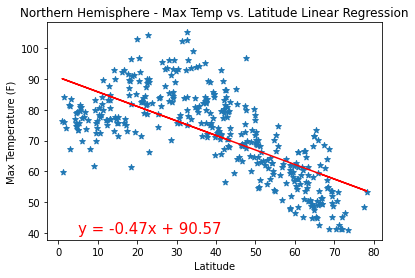

In [69]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = pd.to_numeric(n_hemi['Lat']).astype(float)
y_values = pd.to_numeric(n_hemi['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = "*")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression equation displays a negative correlation.")
print("Moving away from the equator lowers the temperature in the Northern Hemisphere")
plt.savefig("..//output_data//north_max_temp_v_lat_plot")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.72x + 78.99
The r-squared is: 0.772059751136288
The regression equation displays a positive correlation.
Moving closer to the equator increases the temperature in the southern hemisphere


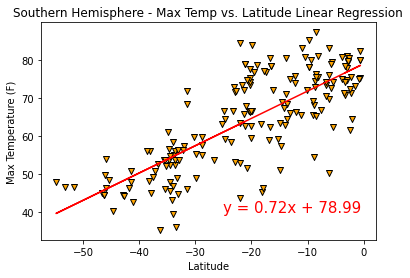

In [70]:
x_values = pd.to_numeric(s_hemi['Lat']).astype(float)
y_values = pd.to_numeric(s_hemi['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = "v" ,facecolors="orange", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression equation displays a positive correlation.")
print("Moving closer to the equator increases the temperature in the southern hemisphere")
plt.savefig("..//output_data//south_max_temp_v_lat_plot")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.02x + 70.59
The r-squared is: 0.02374851634212273
The regression does not display much of a correlation between the data sets.


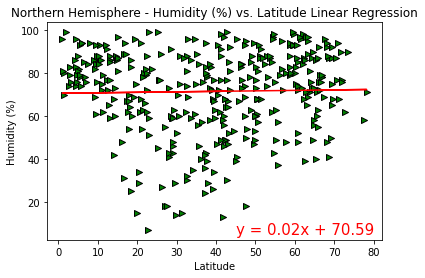

In [71]:
x_values = pd.to_numeric(n_hemi['Lat']).astype(float)
y_values = pd.to_numeric(n_hemi['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = ">", facecolors="green", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.savefig("..//output_data//north_humid_v_lat_plot")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.06x + 74.8
The r-squared is: 0.042951160992672294
The regression equation does not indicate any correlation between humidity and latitude in the southern hemisphere.


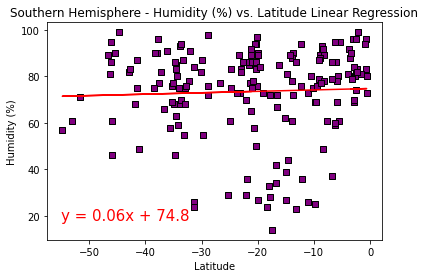

In [72]:
x_values = pd.to_numeric(s_hemi['Lat']).astype(float)
y_values = pd.to_numeric(s_hemi['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = "s", facecolors="purple", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,18),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression equation does not indicate any correlation between humidity and latitude in the southern hemisphere.")
plt.savefig("..//output_data//south_humid_v_lat_plot")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.12x + 62.71
The r-squared is: -0.06228343570450515
The regression equation does not show a correlation between cloudiness and latitude in the northern hemisphere.


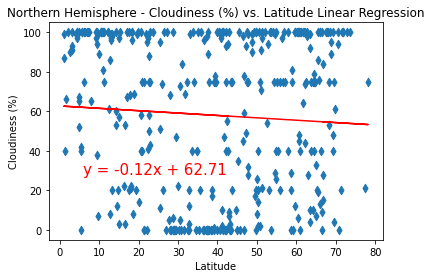

In [73]:
x_values = pd.to_numeric(n_hemi['Lat']).astype(float)
y_values = pd.to_numeric(n_hemi['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = "d")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,28),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression equation does not show a correlation between cloudiness and latitude in the northern hemisphere.")
plt.savefig("..//output_data//north_cloud_v_lat_plot")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.04x + 48.59
The r-squared is: 0.015940047470221635
The regression equations does not show a correlation between cloudiness and latitude in the southern hemisphere.


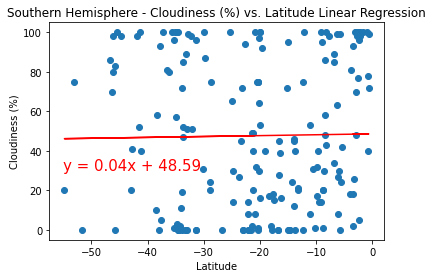

In [74]:
x_values = pd.to_numeric(s_hemi['Lat']).astype(float)
y_values = pd.to_numeric(s_hemi['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = "o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression equations does not show a correlation between cloudiness and latitude in the southern hemisphere.")
plt.savefig("..//output_data//south_cloud_v_lat_plot")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.03x + 9.58
The r-squared is: -0.11459030842040091
The regression equation does not display a correlation between wind speed and latitude in the northern hemisphere.


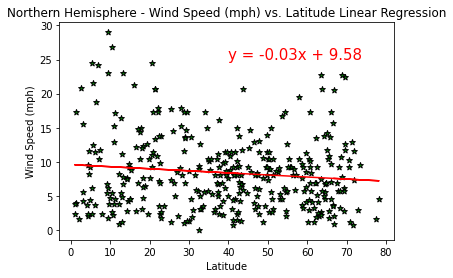

In [75]:
x_values = pd.to_numeric(n_hemi['Lat']).astype(float)
y_values = pd.to_numeric(n_hemi['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = "*", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression equation does not display a correlation between wind speed and latitude in the northern hemisphere.")
plt.savefig("..//output_data//north_windspeed_v_lat_plot")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.06x + 7.54
The r-squared is: -0.13582369587835086
The regression equation does not show a correlation between wind speed and latitude in the southern hemisphere.


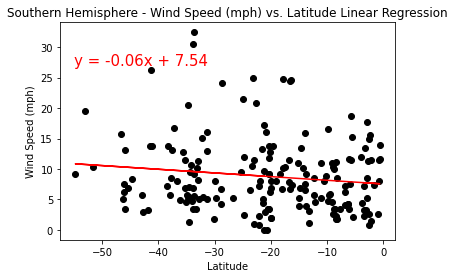

In [76]:
x_values = pd.to_numeric(s_hemi['Lat']).astype(float)
y_values = pd.to_numeric(s_hemi['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = "o", facecolors="black", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,27),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression equation does not show a correlation between wind speed and latitude in the southern hemisphere.")
plt.savefig("..//output_data//south_windspeed_v_lat_plot")
plt.show()
